In [2]:
import pandas as pd
from minepy import MINE
from joblib  import Parallel,delayed
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def mic(x,y):
    '''输入为dataframe'''
    if type(x) == pd.DataFrame:
        x = x.score.values.ravel()
        y = y.score.values.ravel()
    m = MINE(est ='mic_e')
    m.compute_score(x,y)
    return m.mic()

def cal_raw(x,pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(mic)(x,y) for y in pred_list)
    return result

def cal_matrix(pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(cal_raw)(x,pred_list) for x in pred_list)
    return np.array(result)

def plot_mic_matrix(mic_matrix,ticks):
    plt.figure(figsize=(20,20))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.heatmap(mic_matrix,linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True,xticklabels=ticks,yticklabels =ticks)

In [18]:
%%time
file_names = [file for file in os.listdir('./basic_pred/') if file[0]!='.']
file_names = sorted(file_names,key=lambda x:int(x.split('.')[0][3:]))
pred_list = []
for file in file_names:
    pred = pd.read_csv(os.path.join('./basic_pred/',file))
    pred_list.append(pred)
mic_matrix = cal_matrix(pred_list)

[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done   5 out of  36 | elapsed:  3.7min remaining: 23.2min
[Parallel(n_jobs=36)]: Done   9 out of  36 | elapsed:  3.7min remaining: 11.2min
[Parallel(n_jobs=36)]: Done  13 out of  36 | elapsed:  3.7min remaining:  6.6min
[Parallel(n_jobs=36)]: Done  17 out of  36 | elapsed:  3.7min remaining:  4.2min
[Parallel(n_jobs=36)]: Done  21 out of  36 | elapsed:  3.7min remaining:  2.7min
[Parallel(n_jobs=36)]: Done  25 out of  36 | elapsed:  3.7min remaining:  1.6min
[Parallel(n_jobs=36)]: Done  29 out of  36 | elapsed:  3.7min remaining:   54.2s
[Parallel(n_jobs=36)]: Done  33 out of  36 | elapsed:  3.7min remaining:   20.4s


KeyboardInterrupt: 

In [19]:
import joblib
joblib.dump(mic_matrix,'mic_matrix')

['mic_matrix']

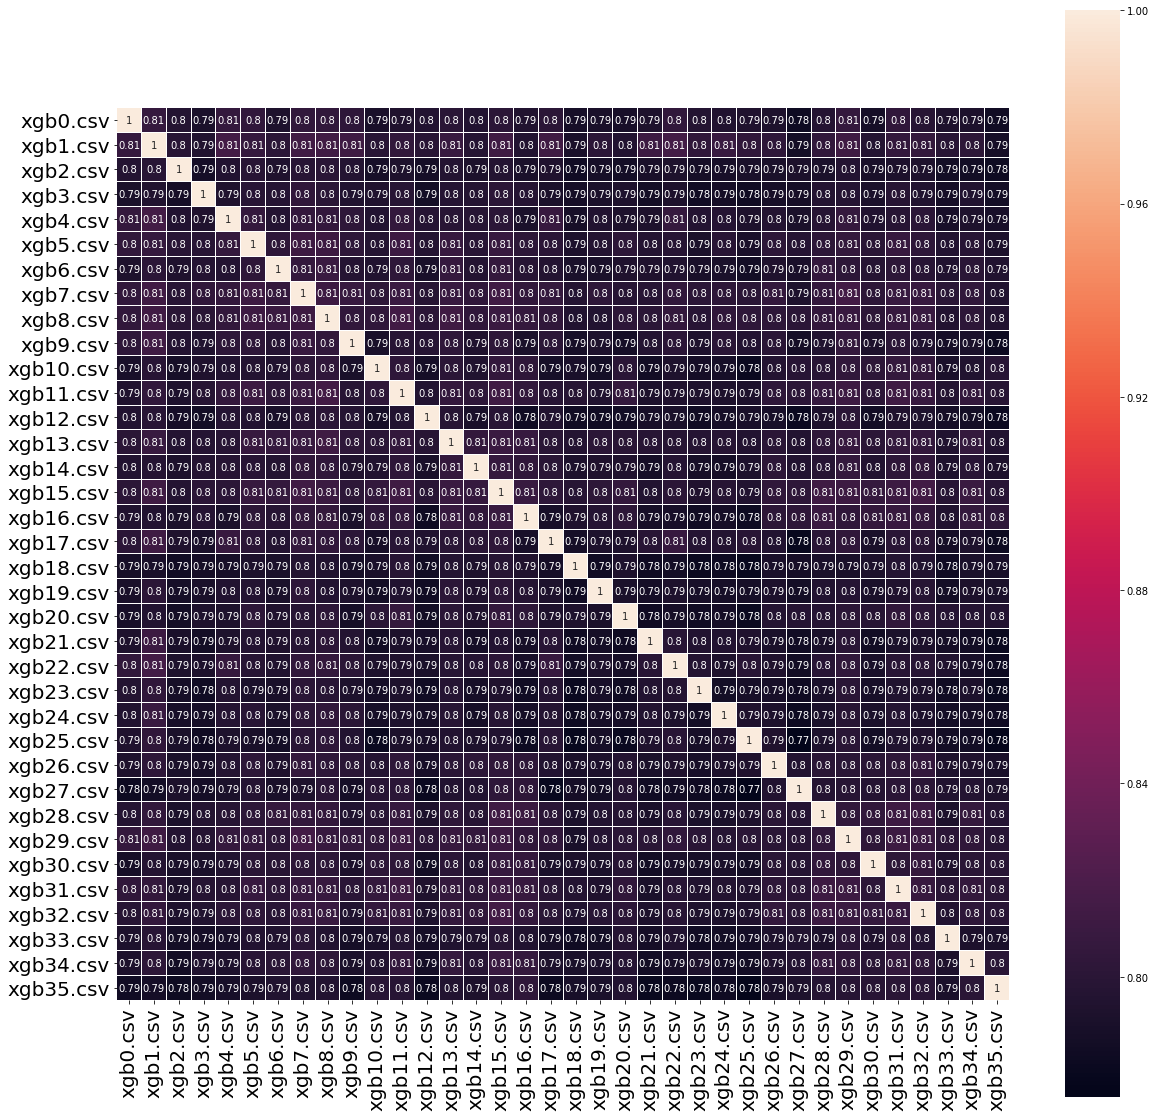

In [20]:
plot_mic_matrix(mic_matrix,file_names)